### Compare default and new allometries

In [1]:
from scipy.stats import qmc
import numpy as np
import xarray as xr
import csv
import pandas as pd
import os
import netCDF4 as nc4
from scipy.io import netcdf as nc
import sys
from tempfile import TemporaryFile                                                                                                                                 
import argparse                                                                                                                                                     
import shutil                                                                                                                                                       
import tempfile 
import random

import math as m
from scipy.optimize import curve_fit
from scipy.stats import linregress

nan = float("nan")

#import functions_py.modp as mp
#import fates_xarray_functions as fa

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import cartopy.crs as ccrs
from matplotlib import cm

dark = cm.get_cmap('Paired', 12)
colormap = dark(range(12))

In [2]:
pftnames = ['broadleaf_evergreen_tropical_tree','needleleaf_evergreen_extratrop_tree',
         'needleleaf_colddecid_extratrop_tree','broadleaf_evergreen_extratrop_tree',
        'broadleaf_hydrodecid_tropical_tree','broadleaf_colddecid_extratrop_tree',
        'broadleaf_evergreen_extratrop_shrub','broadleaf_hydrodecid_extratrop_shrub',
        'broadleaf_colddecid_extratrop_shrub', 'arctic_c3_grass',
        'cool_c3_grasss','c4_grass']

In [3]:
dbh = np.arange(1,250,1)

In [4]:
def d2hmc (d, p1, p2, p3) :
    h = (p1 * d**p2) / (p3 + d**p2)
    return h

initial_guess = [58.0, 0.73, 21.8]


In [5]:
def d2hob (d, p1, p2, dbhmax) : 
    h = 10**(np.log10(min(d, dbhmax))*p1+p2)
    return h  

In [6]:
fates_allom_d2h1 = [0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 
    0.64, 0.64, 0.64 ]

fates_allom_d2h2 = [0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 
    0.37, 0.37, 0.37 ]

fates_allom_dbh_maxheight = [90, 80, 80, 80, 90, 80, 3, 3, 2, 0.35, 0.35, 0.35]

v1fates_allom_d2h1 = [78.40877, 306.842667, 106.874582, 104.358684, 78.40877, 31.455705,                                                                                                                                    
    0.64, 0.64, 0.64, 0.64, 0.64, 0.64]

v1fates_allom_d2h2 = [0.812438, 0.752377, 0.94713, 1.114697, 0.812438, 0.973409, 0.37, 0.37, 0.37,                                                                                                                          
    0.37, 0.37, 0.37 ]

v1fates_allom_d2h3 = [47.666616, 196.686569, 93.979046, 160.683509, 47.666616, 16.592817, -999.9,                                                                                                                           
    -999.9, -999.9, -999.9, -999.9, -999.9 ]

v1fates_allom_dbh_maxheight = [1000, 1000, 1000, 1000, 1000, 1000, 3, 3, 2, 0.35, 0.35, 0.35]

Text(0.5, 0.01, 'DBH (cm)')

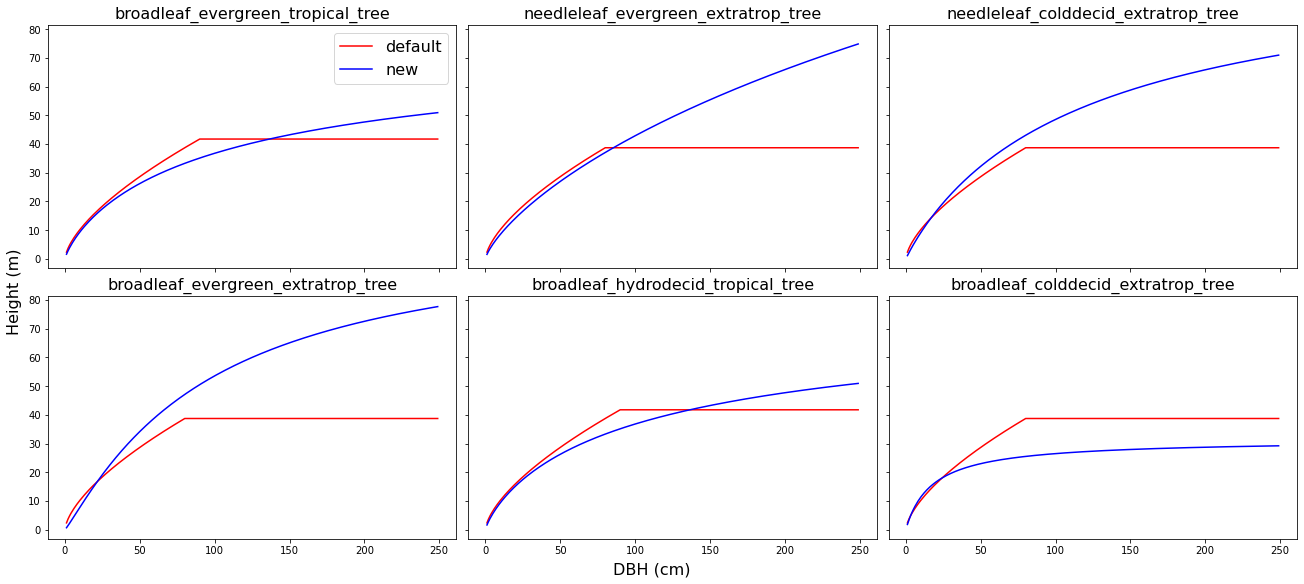

In [7]:
fig, axs = plt.subplots(nrows=2,ncols=3,
                        figsize=(18,8),sharex=True, sharey=True, constrained_layout=True)
axs=axs.flatten()

for i in range(0, 6):
    
    defh = [d2hob(d, fates_allom_d2h1[i], fates_allom_d2h2[i], fates_allom_dbh_maxheight[i])  for  d  in dbh]
    newh = [d2hmc(d, v1fates_allom_d2h1[i], v1fates_allom_d2h2[i], v1fates_allom_d2h3[i])  for  d  in dbh]
    
    axs[i].plot(dbh, defh, color='red', label = 'default')
    axs[i].plot(dbh, newh, color='blue', label = 'new')
    axs[i].set_title(pftnames[i], fontsize=16)
    if i==0:
        axs[i].legend(fontsize=16)
    
fig.supylabel('Height (m)', fontsize=16)
fig.supxlabel('DBH (cm)', fontsize=16)

### Crown area 

In [8]:
def d2ca (d, p1, p2, dbhmax) :
    ca = p1 * min(d,dbhmax) ** p2
    return ca

In [9]:
fates_allom_d2bl2 = [1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 
    1.3 ]

fates_allom_d2ca_coefficient_max = [0.6568464, 0.6568464, 0.6568464, 
    0.6568464, 0.6568464, 0.6568464, 0.6568464, 0.6568464, 0.6568464, 
    0.6568464, 0.6568464, 0.6568464 ]

fates_allom_d2ca_coefficient_min = [0.3381119, 0.3381119, 0.3381119, 
    0.3381119, 0.3381119, 0.3381119, 0.3381119, 0.3381119, 0.3381119, 
    0.3381119, 0.3381119, 0.3381119 ]


v1fates_allom_d2bl2 = [1.481968, 1.183437, 0.985124, 1.742140, 1.481968, 1.049894,                                                                                                                                          
    1.3, 1.3, 1.3, 1.3, 1.3, 1.3]                                                                                                                                                                                         
                                                                                                                                                                                                                                                                                                                                                                                                                                                    
v1fates_allom_d2ca_coefficient_max = [0.271589, 0.369372, 1.078726, 0.057930,                                                                                                                                               
    0.271589, 1.155361, 0.6568464, 0.6568464, 0.6568464, 0.6568464, 0.6568464, 0.6568464 ]                                                                                                                                
                                                                                                                                                                                                                          
v1fates_allom_d2ca_coefficient_min = [0.271589, 0.369372, 1.078726, 0.057930,                                                                                                                                               
    0.271589, 1.155361, 0.3381119, 0.3381119, 0.3381119, 0.3381119, 0.3381119, 0.3381119]

v1fates_allom_blca_expnt_diff =  [-0.12, -0.34, -0.32, -0.22, -0.12, -0.35,                                                                                                                                                 
     0.0, 0.0, 0.0, 0.0, 0.0, 0.0  ]

Text(0.5, 0.01, 'DBH (cm)')

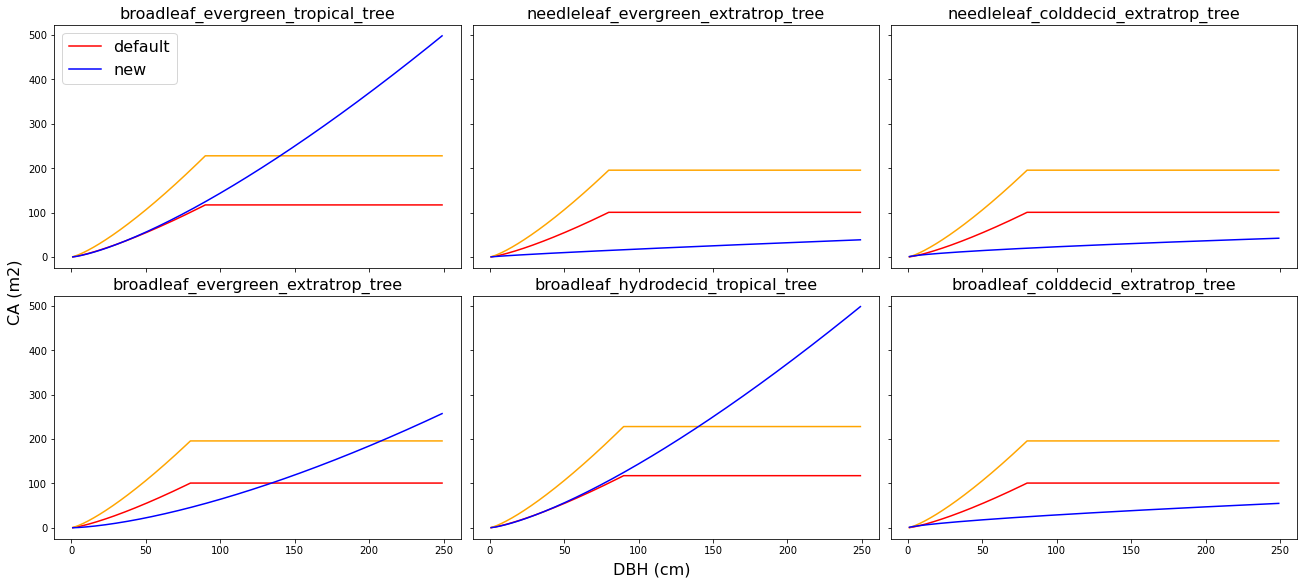

In [11]:
fig, axs = plt.subplots(nrows=2,ncols=3,
                        figsize=(18,8),sharex=True, sharey=True, constrained_layout=True)
axs=axs.flatten()

for i in range(0, 6):
    
    ca_p2 = fates_allom_d2bl2[i]
    
    v1ca_p2 = v1fates_allom_d2bl2[i] + v1fates_allom_blca_expnt_diff[i]
    
    defca_min = [d2ca(d, fates_allom_d2ca_coefficient_min[i], ca_p2, fates_allom_dbh_maxheight[i])  for  d  in dbh]
    defca_max = [d2ca(d, fates_allom_d2ca_coefficient_max[i], ca_p2, fates_allom_dbh_maxheight[i])  for  d  in dbh]
    
    newca = [d2ca(d, v1fates_allom_d2ca_coefficient_min[i], v1ca_p2, v1fates_allom_dbh_maxheight[i])  for  d  in dbh]
    
    axs[i].plot(dbh, defca_min, color='red', label = 'default')
    axs[i].plot(dbh, defca_max, color='orange', label = '')
    axs[i].plot(dbh, newca, color='blue', label = 'new')
    axs[i].set_title(pftnames[i], fontsize=16)
    if i==0:
        axs[i].legend(fontsize=16)
    
fig.supylabel('CA (m2)', fontsize=16)
fig.supxlabel('DBH (cm)', fontsize=16)

### Aboveground biomass

In [12]:
def dh2bagw_chave (d, p1, p2, h1, h2, h3, wd) :
    
    h = (h1 * d**h2) / (h3 + d**h2)
    
    agb = ( p1 * (wd * d**2 * h)**p2 ) / 2
    
    return agb

In [13]:
def dh2bagw_salda (d, p1, p2, p3, p4, h1, h2, dbhmax, wd) :
    
    h = 10**(np.log10(min(d, dbhmax))*h1+h2)
    
    bagw = 0.6 * p1 * (h**p2) * (d**p3) * (wd**p4)
    
    return bagw

In [14]:
fates_allom_agb1 = [0.06896, 0.06896, 0.06896, 0.06896, 0.06896, 0.06896, 
    0.06896, 0.06896, 0.06896, 0.01, 0.01, 0.01 ]

fates_allom_agb2 = [0.572, 0.572, 0.572, 0.572, 0.572, 0.572, 0.572, 0.572, 
    0.572, 0.572, 0.572, 0.572 ]

fates_allom_agb3 = [1.94, 1.94, 1.94, 1.94, 1.94, 1.94, 1.94, 1.94, 1.94, 
    1.94, 1.94, 1.94 ]

fates_allom_agb4 =[ 0.931, 0.931, 0.931, 0.931, 0.931, 0.931, 0.931, 0.931, 
    0.931, 0.931, 0.931, 0.931 ]

fates_wood_density = [0.7, 0.4, 0.7, 0.53, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 
    0.7 ]

v1fates_allom_agb1 = [0.0673, 0.136401, 0.039306, 0.265369, 0.0673, 0.07287,                                                                                                                                                
    0.06896, 0.06896, 0.06896, 0.01, 0.01, 0.01 ]

v1fates_allom_agb2 = [0.976, 0.944904, 1.087335, 0.832132, 0.976, 1.037321, 0.572, 0.572,                                                                                                                                   
    0.572, 0.572, 0.572, 0.572]

v1fates_wood_density = [0.7, 0.4, 0.7, 0.53, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 
    0.7 ]


Text(0.5, 0.01, 'DBH (cm)')

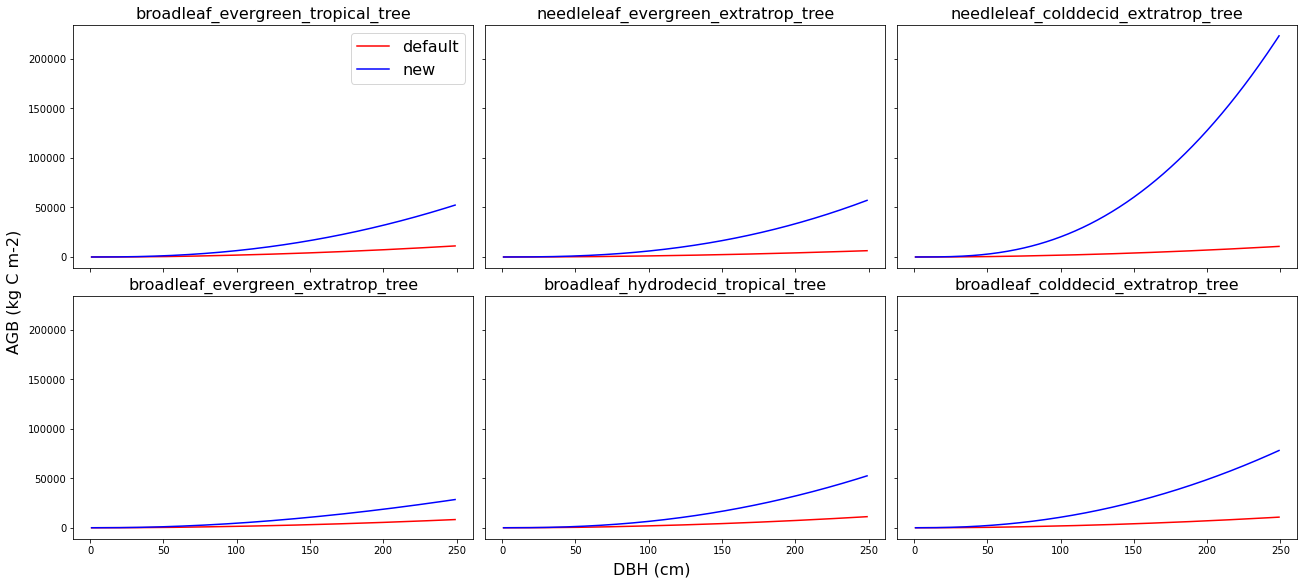

In [15]:
fig, axs = plt.subplots(nrows=2,ncols=3,
                        figsize=(18,8),sharex=True, sharey=True, constrained_layout=True)
axs=axs.flatten()

for i in range(0, 6):
    
    defagb = [dh2bagw_salda(d, fates_allom_agb1[i], fates_allom_agb2[i], fates_allom_agb3[i],
                            fates_allom_agb4[i],
                            fates_allom_d2h1[i], fates_allom_d2h2[i], fates_allom_dbh_maxheight[i], 
                            fates_wood_density[i])  for  d  in dbh]
    
    
    
    newagb = [dh2bagw_chave(d, v1fates_allom_agb1[i], v1fates_allom_agb2[i], v1fates_allom_d2h1[i], 
                            v1fates_allom_d2h2[i], v1fates_allom_d2h3[i], v1fates_wood_density[i])  for  d  in dbh]
    
    axs[i].plot(dbh, defagb, color='red', label = 'default')
    axs[i].plot(dbh, newagb, color='blue', label = 'new')
    axs[i].set_title(pftnames[i], fontsize=16)
    if i==0:
        axs[i].legend(fontsize=16)
    
fig.supylabel('AGB (kg C m-2)', fontsize=16)
fig.supxlabel('DBH (cm)', fontsize=16)

### Leaf biomass

In [16]:
def d2blmax_salda(d, p1, p2, p3, dbhmax, wd) : 
    blmax = p1 * min(d, dbhmax)**p2 * wd**p3
    return(blmax)

In [17]:
def d2blmax_pwr(d, p1, p2) :
    blmax = (p1*d**p2) / 2.0
    return(blmax)

In [18]:
fates_allom_d2bl1 = [0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 
    0.07, 0.07, 0.07 ]

fates_allom_d2bl2 = [1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 
    1.3 ]

fates_allom_d2bl3 = [0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 
    0.55, 0.55, 0.55 ]


v1fates_allom_d2bl1 = [0.04, 0.07, 0.07, 0.01, 0.04, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07 ]

v1fates_allom_d2bl2 = [1.481968, 1.183437, 0.985124, 1.742140, 1.481968, 1.049894,                                                                                                                                          
    1.3, 1.3, 1.3, 1.3, 1.3, 1.3 ]



Text(0.5, 0.01, 'DBH (cm)')

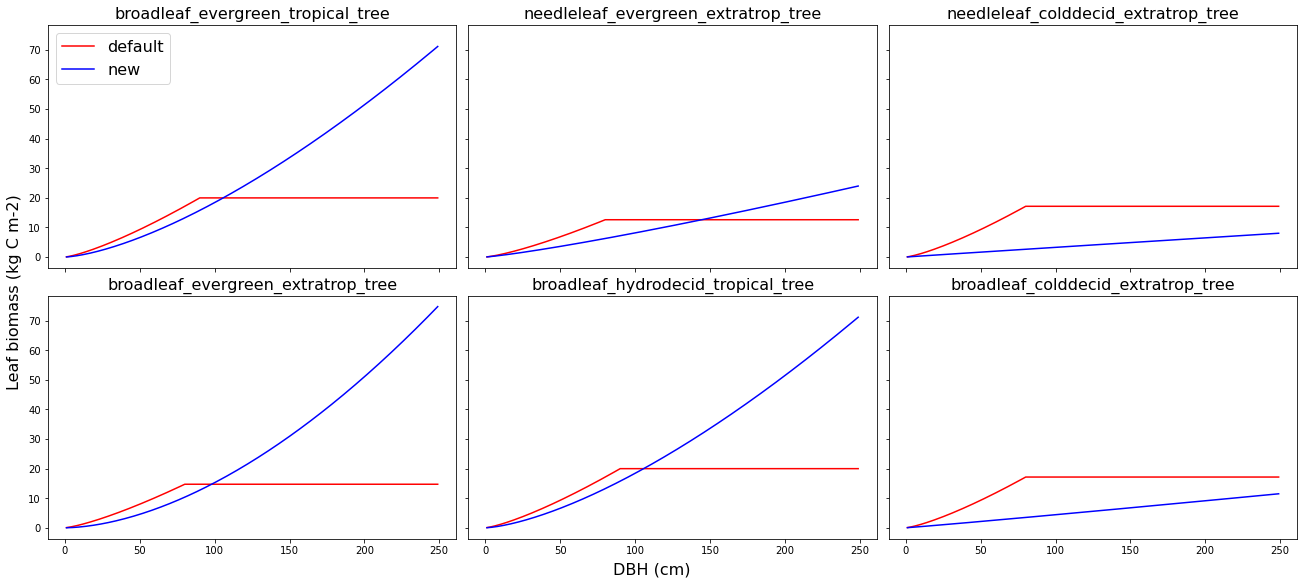

In [19]:
fig, axs = plt.subplots(nrows=2,ncols=3,
                        figsize=(18,8),sharex=True, sharey=True, constrained_layout=True)
axs=axs.flatten()

for i in range(0, 6):
    
    defbl = [d2blmax_salda(d, fates_allom_d2bl1[i], fates_allom_d2bl2[i], fates_allom_d2bl3[i], fates_allom_dbh_maxheight[i], 
                            fates_wood_density[i])  for d in dbh]
    
    newbl = [d2blmax_pwr(d, v1fates_allom_d2bl1[i], v1fates_allom_d2bl2[i])  for d in dbh]
    
    axs[i].plot(dbh, defbl, color='red', label = 'default')
    axs[i].plot(dbh, newbl, color='blue', label = 'new')
    axs[i].set_title(pftnames[i], fontsize=16)
    if i==0:
        axs[i].legend(fontsize=16)
    
fig.supylabel('Leaf biomass (kg C m-2)', fontsize=16)
fig.supxlabel('DBH (cm)', fontsize=16)

### LAI 

In [20]:
def decay_coeff_kn ( vcmax25top ) :
    kn = np.exp(0.00963 * vcmax25top  - 2.43)
    return kn

In [21]:
def tree_lai ( leaf_c, c_area, vcmax25top, slatop, slamax) :
    
    g_per_kg = 1000.0
    slat = g_per_kg * slatop
    leafc_per_unitarea = leaf_c / c_area
    canopy_lai_above = 0
        
    kn = decay_coeff_kn(vcmax25top)
    sla_max = g_per_kg * slamax
    leafc_slamax = (slat - sla_max * np.exp(-1.0 * kn * canopy_lai_above)) / (
        -1.0 * kn * slat * sla_max) 
    
    if (leafc_per_unitarea <= leafc_slamax) : 
        tree_lai = (np.log (np.exp(-1 * kn * canopy_lai_above) - kn * slat  * leafc_per_unitarea) + 
                    (kn * canopy_lai_above)) / (-1 * kn)
    else : 
        tree_lai = ((np.log (np.exp(1 * kn * canopy_lai_above) - kn * slat * leafc_slamax) + 
                     (kn * canopy_lai_above)) / (-1 * kn))  +  (leafc_per_unitarea -
                                                                leafc_slamax) * sla_max
        
    return tree_lai

In [22]:
vcmax25top = [57.5, 34.1, 33.15, 33.55, 28.7, 31.9, 62, 54, 54, 78, 78, 78]
nitr_stoich  = [0.033, 0.029, 0.04, 0.033, 0.04, 0.04, 0.033, 0.04, 0.04, 0.04, 0.04, 0.04]
slatop = [0.018, 0.006, 0.0288, 0.0108, 0.036, 0.036, 0.0144, 0.036, 0.036, 0.036, 0.036, 0.03]
slamax= [0.0954, 0.0954, 0.0954, 0.0954, 0.0954, 0.0954, 0.012, 0.03, 0.03, 0.03, 0.03, 0.03]
lnc_top =  [a / b for a,  b  in  zip(nitr_stoich,  slatop)]
umolC_to_kgC = 12.0e-9
g_per_kg = 1000.0

''

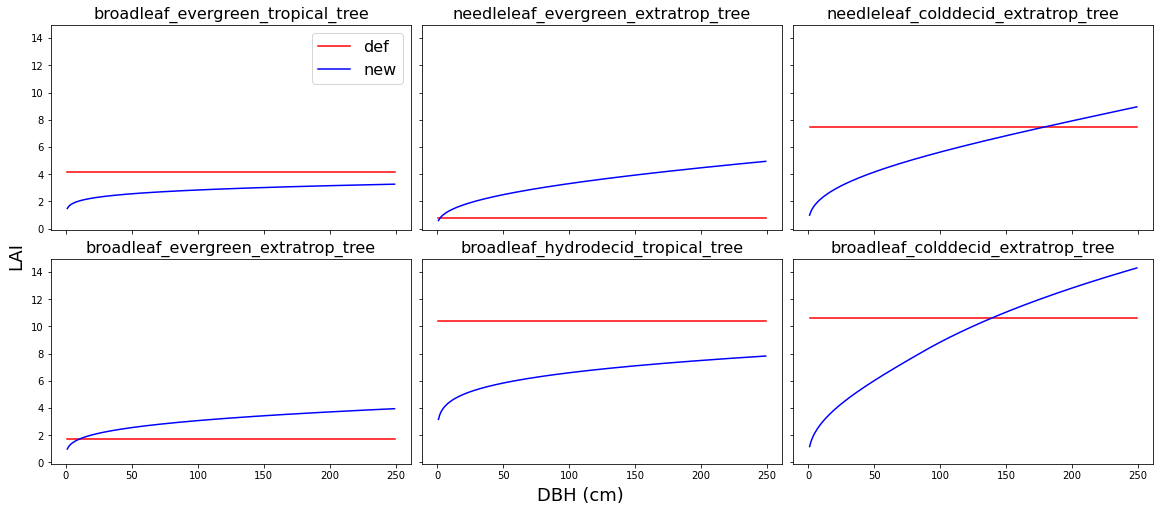

In [26]:
fig2, axs = plt.subplots(nrows=2,ncols=3,
                        figsize=(16,7), constrained_layout=True, sharex=True, sharey=True)

axs = axs.flatten()

# for each tree PFT calculate total vai
for i in range(0, 6) : 
    
    dbh = np.arange(1,250,1)
    
    ca_p2 = fates_allom_d2bl2[i]
    
    v1ca_p2 = v1fates_allom_d2bl2[i] + v1fates_allom_blca_expnt_diff[i]
    
    
    # calculate leaf carbon
    defbl = [d2blmax_salda(d, fates_allom_d2bl1[i], fates_allom_d2bl2[i], fates_allom_d2bl3[i], fates_allom_dbh_maxheight[i], 
                            fates_wood_density[i])  for d in dbh]
    
    # calculate crown area
    defca_min = [d2ca(d, fates_allom_d2ca_coefficient_min[i], ca_p2, 
                      fates_allom_dbh_maxheight[i])  for  d  in dbh]
    
    def_lai_curve = [tree_lai( leaf_c, c_area, vcmax25top[i], slatop[i], slamax[i])
             for leaf_c, c_area in zip(defbl, defca_min)]
    
    
    # New 
    newbl = [d2blmax_pwr(d, v1fates_allom_d2bl1[i], v1fates_allom_d2bl2[i])  for d in dbh]
   
    newca = [d2ca(d, v1fates_allom_d2ca_coefficient_min[i], v1ca_p2, v1fates_allom_dbh_maxheight[i])  for  d  in dbh]
    
    new_lai_curve = [tree_lai( leaf_c, c_area, vcmax25top[i], slatop[i], slamax[i])
             for leaf_c, c_area in zip(newbl, newca)]
    
    axs[i].plot(dbh, def_lai_curve, color='red', label = 'def')
    axs[i].plot(dbh, new_lai_curve, color='blue', label = 'new')
    
    if i == 0:
        axs[i].legend(fontsize=16)
    
    axs[i].set_title(pftnames[i], fontsize=16)

fig2.supylabel('LAI', fontsize=18)
fig2.supxlabel('DBH (cm)', fontsize=18)  
;